In [83]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import pylab
from skimage.measure import compare_psnr

%matplotlib inline

## Инструкция по выполнению
1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [2]:
image = imread('data/parrots.jpg')

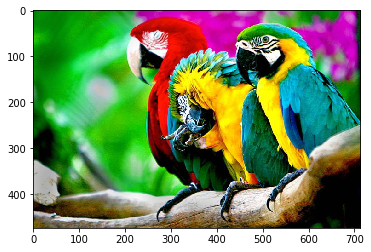

In [3]:
pylab.imshow(image)

In [4]:
img = img_as_float(image)

2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [5]:
img.shape

(474, 713, 3)

In [6]:
X = img.reshape(img.shape[0]*img.shape[1],img.shape[2])

3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [8]:
kmeans = KMeans(init='k-means++',random_state=241).fit(X)

In [20]:
labels = kmeans.labels_

In [24]:
info = np.insert(X, 3,labels, axis = 1)

In [37]:
mean_colors = {}
median_colors = {}
for cls in np.unique(info[:,3]):
    mean_colors[cls] = [np.mean(info[info[:,3]==cls][:,0]),
                        np.mean(info[info[:,3]==cls][:,1]),
                        np.mean(info[info[:,3]==cls][:,2]),
                       ]
    median_colors[cls] = [np.median(info[info[:,3]==cls][:,0]),
                        np.median(info[info[:,3]==cls][:,1]),
                        np.median(info[info[:,3]==cls][:,2]),
                       ]

In [70]:

mean_img = np.empty((img.shape[0],img.shape[1],img.shape[2]))
med_img = np.empty((img.shape[0],img.shape[1],img.shape[2]))
for y in range(img.shape[0]):
    for x in  range(img.shape[1]):
        index = y*img.shape[1]+x
        mean_img[y][x] = mean_colors[info[index][3]]
        med_img[y][x] = median_colors[info[index][3]]

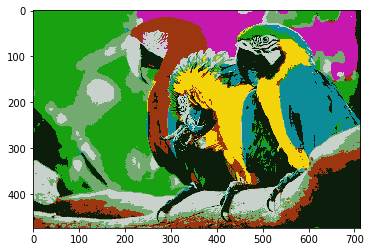

In [71]:
pylab.imshow(mean_img)

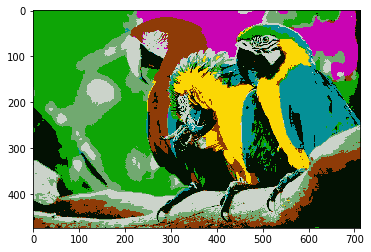

In [72]:
pylab.imshow(med_img)

4. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно

In [86]:
compare_psnr(img,mean_img), compare_psnr(img,med_img)

(18.436829014063576, 18.1379714433961)

5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче